https://github.com/Alfred1984/interesting-python/blob/master/English_names/Babynames.ipynb

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#画图用
import seaborn as sns#设文字用
from pyecharts.charts import Bar, Line#打开cmd, pip install pyecharts,然后重启jupyter
#from pyecharts import Overlap#好像已经没有这个了

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
#画布
%matplotlib inline

In [102]:
data = pd.read_csv('NationalNames.csv')#自己先手动解压zip

In [103]:
data.head()#查看前6行数据

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [104]:
data.info()#查看数据基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 5 columns):
Id        int64
Name      object
Year      int64
Gender    object
Count     int64
dtypes: int64(3), object(2)
memory usage: 73.4+ MB


## 1. 2010-2017年，Top15的男生、女生英文名

### - 男生

data.loc[xx,:]

In [105]:
#取出Year=2010-2017和Gender=M的行，并按Name汇总，并按Count求和，取出最大的15个
top15_boy = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'M'), :].groupby('Name').Count.sum().nlargest(15)
top15_boy

Name
Noah         145195
Jacob        140091
Mason        133535
Liam         133019
William      131241
Ethan        125561
Michael      122265
Alexander    118376
James        112387
Daniel       111658
Elijah       110075
Aiden        109852
Jayden       109122
Benjamin     107648
Matthew      105429
Name: Count, dtype: int64

In [106]:
boy_total = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'M'), :].groupby('Name').Count.sum().sum()
boy_total#同样条件算Count加总

15140560

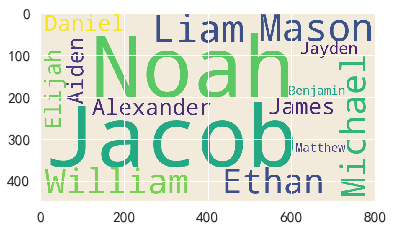

In [107]:
from wordcloud import WordCloud
name = list(top15_boy.index)#取出名字
value = list(top15_boy.values)#取出数量
frequency={key:val for key in name for val in value}#转成dict
wordcloud = WordCloud(width=800, height=450,background_color='#f2eada')  # feeeed #设定词云图参数
#wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')#加入名字和数量，形状为砖石 #貌似已经没有这个方法了
wordcloud.generate_from_frequencies(frequency)
wordcloud
plt.imshow(wordcloud)#画出图片

In [108]:
data_top15_boy = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'M') & 
                          (data['Name']).isin(list(top15_boy.index)), :]#取出规定Year=2010-2017和Gender=M下，且名字在top15_boy里面的数据

In [109]:
data_top15_boy.sort_values(by = ['Year', 'Count'], ascending=False, inplace=True)#按Year和count按升序排序
data_top15_boy.head()#查看前6行

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Id,Name,Year,Gender,Count
1910505,1910506,Liam,2017,M,18728
1910506,1910507,Noah,2017,M,18326
1910507,1910508,William,2017,M,14904
1910508,1910509,James,2017,M,14232
1910510,1910511,Benjamin,2017,M,13733


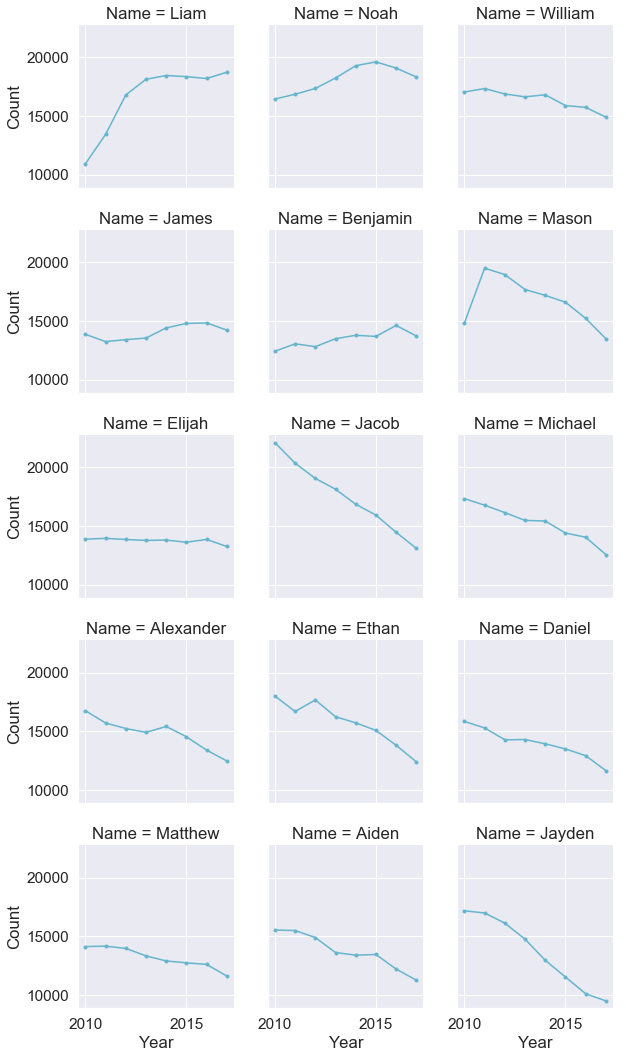

In [110]:
sns.set(font_scale=1.4)#设置文字大小
g = sns.FacetGrid(data_top15_boy, col="Name", col_wrap=3)#设置每个Name一张图，每行3列
g = g.map(plt.plot, "Year", "Count",color="c",marker=".")#横坐标为Year，纵坐标为Count画15个图
#g.set(axis_bgcolor='#feeeed')#设置背景颜色 #f2eada  #不知道为什么会报错

### - 女生

In [111]:
top15_girl = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'F'), :].groupby('Name').Count.sum().nlargest(15)
#同样条件女生版
top15_girl

Name
Emma         158573
Sophia       152936
Olivia       147486
Isabella     142064
Ava          125937
Mia          103580
Emily        100414
Abigail       99356
Madison       84803
Elizabeth     77233
Charlotte     76031
Chloe         71994
Ella          69455
Amelia        68291
Avery         67348
Name: Count, dtype: int64

In [112]:
list(data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'F'), :].groupby('Name').Count.sum().nlargest(30).index)
#前30的名字

['Emma',
 'Sophia',
 'Olivia',
 'Isabella',
 'Ava',
 'Mia',
 'Emily',
 'Abigail',
 'Madison',
 'Elizabeth',
 'Charlotte',
 'Chloe',
 'Ella',
 'Amelia',
 'Avery',
 'Sofia',
 'Evelyn',
 'Harper',
 'Addison',
 'Grace',
 'Natalie',
 'Victoria',
 'Lily',
 'Aubrey',
 'Lillian',
 'Zoey',
 'Hannah',
 'Brooklyn',
 'Layla',
 'Samantha']

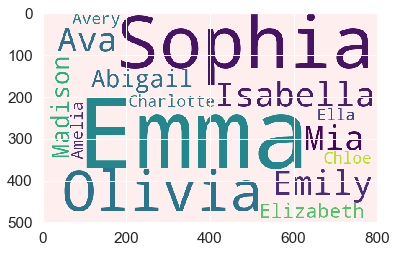

In [113]:
name = list(top15_girl.index)#取出名字
value = list(top15_girl.values)#取出数据
frequency={key:val for key in name for val in value}#转成dict
wordcloud = WordCloud(width=800, height=500,background_color='#feeeed')  # feeeed
#wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
wordcloud.generate_from_frequencies(frequency)#化词云图
wordcloud
plt.imshow(wordcloud)#画出图片

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


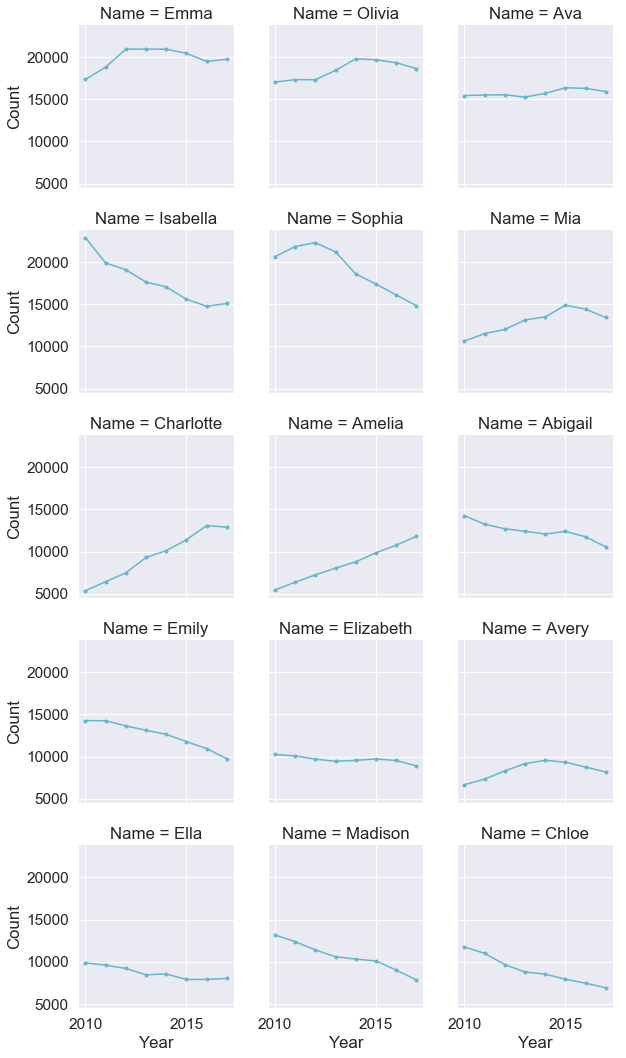

In [114]:
data_top15_girl = data.loc[(data['Year'].isin(list(range(2010,2018)))) & (data['Gender'] == 'F') & 
                          (data['Name']).isin(list(top15_girl.index)), :]#取出数据

data_top15_girl.sort_values(by = ['Year', 'Count'], ascending=False, inplace=True)#按Year和Count排序

sns.set(font_scale=1.4)
g = sns.FacetGrid(data_top15_girl, col="Name", col_wrap=3)#每个名字画一张图

g = g.map(plt.plot, "Year", "Count",color="c",marker=".")
#g.set(axis_bgcolor='#feeeed')

## 2. 每个年代，最流行的英文名字
- 1920-2017

data[xxx]

In [115]:
data_decades = data[data['Year']>=1920]#取出1920及以后数据
data_decades['decade'] = pd.cut(data_decades['Year'], [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2018], 
                                labels = ['20后','30后','40后', '50后','60后','70后','80后','90后','00后','10后'],right=False)#对Year切割，得到年代
data_decades.head()

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,Name,Year,Gender,Count,decade
169455,169456,Mary,1920,F,70980,20后
169456,169457,Dorothy,1920,F,36643,20后
169457,169458,Helen,1920,F,35097,20后
169458,169459,Margaret,1920,F,27997,20后
169459,169460,Ruth,1920,F,26101,20后


In [116]:
decade = data_decades.groupby(['decade', 'Gender', 'Name']).Count.sum().groupby(level=[0,1]).nlargest(1)
#按decade、Gender、Name汇总，并取出每组Count总和最大的那个
decade.head()

decade  Gender  decade  Gender  Name  
20后     F       20后     F       Mary      701746
        M       20后     M       Robert    576362
30后     F       30后     F       Mary      572942
        M       30后     M       Robert    590716
40后     F       40后     F       Mary      640023
Name: Count, dtype: int64

data.iloc[]

Text(0.5, 0, '百分比')

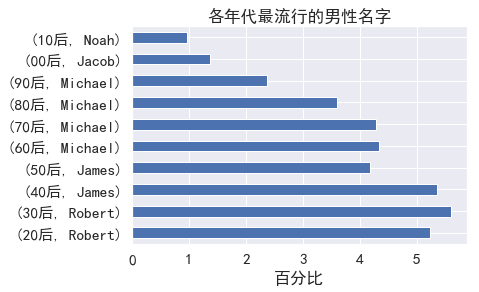

In [117]:
decade_boy_count = decade.iloc[decade.index.get_level_values(3)=='M'].reset_index(level=[0,1,3], drop=True)#取出男性的数据，丢掉没用的列
decade_boy_count.head()

from pylab import mpl 
mpl.rcParams['font.sans-serif'] = ['SimHei']#为了显示中文
decade_boy_total = data_decades[data_decades['Gender']=='M'].groupby('decade').Count.sum()#计算每个年代里面男性的Count值加总
decade_boy_pct = (decade_boy_count/decade_boy_total*100).round(2)#算比例，保留2位小数
ax = decade_boy_pct.plot.barh(title='各年代最流行的男性名字')#画横向的bar图
ax.set_ylabel('')
ax.set_xlabel('百分比')
#ax.set(axis_bgcolor='#f2eada')

Text(0.5, 0, '百分比')

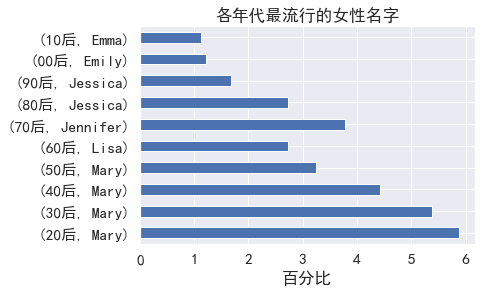

In [118]:
decade_girl_count = decade.iloc[decade.index.get_level_values(3)=='F'].reset_index(level=[0,1,3], drop=True)#同样取出女的数据
decade_girl_total = data_decades[data_decades['Gender']=='F'].groupby('decade').Count.sum()
decade_girl_pct = (decade_girl_count/decade_girl_total*100).round(2)
ax = decade_girl_pct.plot.barh(title='各年代最流行的女性名字')
ax.set_ylabel('')
ax.set_xlabel('百分比')
#ax.set(axis_bgcolor='#feeeed')

## 3. 以前很流行，现在不流行的名字

### -男

In [119]:
data_popular_former = data[(data['Year'] < 1950) & (data['Count'] > 10500) & (data['Gender'] == 'M')]#取出1950年前，Count>10500的男数据
data_not_popular_now = data[(data['Year'] > 2000) & (data['Count'] < 1000) & (data['Gender'] == 'M')]#取出2000年后，Count<1000的男数据

In [120]:
boys_names_popular_former = list(set(list(data_popular_former.Name.unique())) & set(list(data_not_popular_now.Name.unique())))#找到交集
boys_names_popular_former

['Walter',
 'Bruce',
 'Harold',
 'Roger',
 'Larry',
 'Gerald',
 'Ronald',
 'Douglas',
 'Arthur',
 'Frank',
 'Dennis',
 'Terry',
 'Jerry',
 'Gary',
 'Gregory',
 'Donald']

In [121]:
boys_names_popular_former_data = data[(data['Name'].isin(boys_names_popular_former)) & (data['Year']>=1920) & (data['Gender']=='M')]
#取出名字在boys_names_popular_former里，且Year>1920的男的数据
boys_names_popular_former_data.head()
#boys_names_popular_former_data.Count.max()

,Id,Name,Year,Gender,Count
175228,175229,Frank,1920,M,16432
175231,175232,Harold,1920,M,13679
175232,175233,Walter,1920,M,13294
175235,175236,Donald,1920,M,11941
175237,175238,Arthur,1920,M,10236


In [122]:
from pyecharts.charts import Page
import pyecharts.options as opts
attr = list(range(1920, 2018))
attr=[str(i) for i in attr]#转字符串
# #line = Line("",width=800, height=600)
# line = Line()
# for name in boys_names_popular_former:
#    v = list(boys_names_popular_former_data[boys_names_popular_former_data['Name']==name].Count.values)
#    line.add(name, attr, v, legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
#    #print(name,attr,v)
# line

line = Line()#创建Line()
line.add_xaxis(attr)#横坐标
for name in boys_names_popular_former:#遍历每个名字
    v = list(boys_names_popular_former_data[boys_names_popular_former_data['Name']==name].Count.values)#计算相应名字的count值
    v = [int(i) for i in v]#转int
    line.add_yaxis(name, v,label_opts=opts.LabelOpts(is_show=False))#不加标签

line.render_notebook()#画图

### -女

In [123]:
data_popular_former = data[(data['Year'] < 1950) & (data['Count'] > 22500) & (data['Gender'] == 'F')]
data_not_popular_now = data[(data['Year'] > 2000) & (data['Count'] < 1000) & (data['Gender'] == 'F')]

In [124]:
girl_names_popular_former = list(set(list(data_popular_former.Name.unique())) & set(list(data_not_popular_now.Name.unique())))

In [125]:
girl_names_popular_former_data = data[(data['Name'].isin(girl_names_popular_former)) & (data['Year']>=1920) & (data['Gender']=='F')]

In [126]:
attr = list(range(1920, 2018))
attr=[str(i) for i in attr]#转字符串
#line = Line("",width=800, height=600)
# for name in girl_names_popular_former:
#     v = list(girl_names_popular_former_data[girl_names_popular_former_data['Name']==name].Count.values)
#     line.add(name, attr, v,legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
# line

line = Line()#创建Line()
line.add_xaxis(attr)#横坐标
for name in girl_names_popular_former:#遍历每个名字
    v = list(girl_names_popular_former_data[girl_names_popular_former_data['Name']==name].Count.values)#计算相应名字的count值
    v = [int(i) for i in v]#转int
    line.add_yaxis(name, v,label_opts=opts.LabelOpts(is_show=False))#不加标签

line.render_notebook()#画图

## 4. 2000年后越来越流行的名字

### - 男

In [127]:
data_popular_now = data[(data['Year']>=2000)&(data['Gender'] =='M')&(data['Count']>7000)]#取出规定Year<=2000和Gender=M、Count>7000的数据
data_popular_now = data_popular_now.pivot(index='Name', columns='Year',values='Count')#Year和Name交叉表，内容为Count
data_popular_now.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Name,,,,,,,,,,,,,,,,,,
Aaron,9553.0,9535.0,9001.0,8865.0,8389.0,7802.0,8296.0,8935.0,8537.0,7969.0,7461.0,7613.0,7530.0,7301.0,7391.0,7152.0,7150.0,7165.0
Adam,8133.0,7752.0,7749.0,7683.0,7471.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adrian,NaN,NaN,NaN,NaN,NaN,NaN,7381.0,7733.0,7927.0,7631.0,7405.0,7333.0,NaN,NaN,NaN,NaN,NaN,NaN
Aidan,NaN,NaN,NaN,10062.0,9821.0,9758.0,10034.0,8420.0,7698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aiden,NaN,NaN,NaN,NaN,7159.0,9081.0,11583.0,13101.0,15578.0,16017.0,15535.0,15492.0,14896.0,13615.0,13394.0,13449.0,12212.0,11259.0


In [128]:
year = pd.DataFrame({'Year':list(range(2000, 2018))}, index=list(range(2000, 2018)))#做义工2000-2018的dataframe
year

,Year
2000,2000
2001,2001
2002,2002
2003,2003
2004,2004
2005,2005
2006,2006
2007,2007
2008,2008
2009,2009


In [129]:
data_popular_now_corr = data_popular_now.corrwith(year['Year'], axis=1)#计算每个name与year的的相关性
boys_names_popular_now = list(data_popular_now_corr[data_popular_now_corr > 0.8].index)#取出高相关的人
boys_names_popular_now

['Carter',
 'Elijah',
 'Grayson',
 'Henry',
 'Julian',
 'Levi',
 'Liam',
 'Lincoln',
 'Lucas',
 'Mason',
 'Noah',
 'Oliver',
 'Owen',
 'Sebastian',
 'Wyatt']

In [130]:
boys_names_popular_now_data = data[(data['Name'].isin(boys_names_popular_now)) & (data['Year']>=1920) & (data['Gender']=='M')]
#取出名字和boys_names_popular_now一样，且Year>1920，男的数据
boys_names_popular_now_data.head()

,Id,Name,Year,Gender,Count
175236,175237,Henry,1920,M,11304
175354,175355,Oliver,1920,M,1164
175414,175415,Julian,1920,M,693
175436,175437,Owen,1920,M,598
175575,175576,Elijah,1920,M,277


In [131]:
boys_names_popular_now_data = boys_names_popular_now_data.pivot(index='Name', columns='Year',values='Count').reset_index().melt('Name', value_name='Count')
#Name和Year交叉，且转成dataframe
boys_names_popular_now_data.head()

,Name,Year,Count
0,Carter,1920,98.0
1,Elijah,1920,277.0
2,Grayson,1920,28.0
3,Henry,1920,11304.0
4,Julian,1920,693.0


In [132]:
attr = list(range(1920, 2018))
attr=[str(i) for i in attr]#转字符串
# line = Line("",width=800, height=600)
# for name in boys_names_popular_now:
#     v = list(boys_names_popular_now_data[boys_names_popular_now_data['Name']==name].Count.values)
#     line.add(name, attr, v, legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
# line

line = Line()#创建Line()
line.add_xaxis(attr)#横坐标
for name in boys_names_popular_now:#遍历每个名字
    v0 = list(boys_names_popular_now_data[boys_names_popular_now_data['Name']==name].Count.values)#计算相应名字的count值
    v=[]
    for i in v0:
        if i==i:
            v.append(int(i))#转int
        else:
            v.append(0)#NaN值处理成0
    line.add_yaxis(name, v,label_opts=opts.LabelOpts(is_show=False))#不加标签

line.render_notebook()#画图

### -女

In [133]:
data_popular_now = data[(data['Year']>=2000)&(data['Gender'] =='F')&(data['Count']>6000)]
data_popular_now = data_popular_now.pivot(index='Name', columns='Year',values='Count')

In [134]:
data_popular_now_corr = data_popular_now.corrwith(year['Year'], axis=1)
girls_names_popular_now = list(data_popular_now_corr[data_popular_now_corr > 0.7].index)

In [135]:
girls_names_popular_now_data = data[(data['Name'].isin(girls_names_popular_now)) & (data['Year']>=1920) & (data['Gender']=='F')]

In [136]:
girls_names_popular_now_data = girls_names_popular_now_data.pivot(index='Name', columns='Year',values='Count').reset_index().melt('Name', value_name='Count')

In [137]:
attr = list(range(1920, 2018))
attr=[str(i) for i in attr]#转字符串
# line = Line("",width=800, height=600)
# for name in girls_names_popular_now:
#     v = list(girls_names_popular_now_data[girls_names_popular_now_data['Name']==name].Count.values)
#     line.add(name, attr, v, legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
# line

line = Line()#创建Line()
line.add_xaxis(attr)#横坐标
for name in girls_names_popular_now:#遍历每个名字
    v0 = list(girls_names_popular_now_data[girls_names_popular_now_data['Name']==name].Count.values)#计算相应名字的count值
    v=[]
    for i in v0:
        if i==i:
            v.append(int(i))#转int
        else:
            v.append(0)#NaN值处理成0
    line.add_yaxis(name, v,label_opts=opts.LabelOpts(is_show=False))#不加标签

line.render_notebook()#画图

## 5. 影响美国人取名的因素：体育明星、电视明星

In [138]:
# from pyecharts import Overlap
# def name_trend(name, data, gender=['M','F'], year=1920, dodge = 500):
#     if isinstance(gender, str):
#         name_data = data[(data['Name'] == name)&(data['Gender']==gender)&(data['Year']>=year)]
#         attr = list(name_data['Year'].values)
#         bar = Bar(name)
#         bar.add("", attr, list(name_data['Count'].values), mark_line=["average"], mark_point=["max", "min"],
#                legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
#         line = Line()
#         line.add("", attr, list(name_data['Count'].values + dodge))
        
#     else:
#         name_data = data[(data['Name'] == name)&(data['Year']>=year)]
#         attr = list(range(year, 2018))
#         v1 = name_data[name_data['Gender']==gender[0]].Count.values
#         v2 = name_data[name_data['Gender']==gender[1]].Count.values
#         bar = Bar(name)
#         bar.add("男", attr, list(v1), legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
#         bar.add("女", attr, list(v2), legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
#         line = Line()
#         line.add("", attr, list(v1 + dodge))
#         line.add("", attr, list(v2 + dodge))
    
#     overlap = Overlap()
#     overlap.add(bar)
#     overlap.add(line)
#     return overlap

def name_trend(name, data, gender=['M','F'], year=1920, dodge = 500):
    if isinstance(gender, str):#若gender为字符串
        name_data = data[(data['Name'] == name)&(data['Gender']==gender)&(data['Year']>=year)]#取出特定名字、性别、年份的数据
        attr = list(name_data['Year'].values)#取出年份的值
        attr=[str(i) for i in attr]#转字符串
        v1=name_data['Count'].values
        v1= [int(i) for i in v1]#转int
        v1d= [int(i)+dodge for i in v1]#转int
        bar = Bar()#画bar图，
        bar.add_xaxis(attr)#bar的横坐标
        bar.add_yaxis(name, list(v1))#第一组数据
        bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))#不展示点标签
        line = Line()
        line.add_xaxis(attr)#line的横坐标
        line.add_yaxis(name, v1d,label_opts=opts.LabelOpts(is_show=False))#不加标签
        
    else:
        name_data = data[(data['Name'] == name)&(data['Year']>=year)]#取出特定名字、年份的数据
        attr = list(range(year, 2018))#取出该年份到2018的年份
        attr=[str(i) for i in attr]#转字符串
        v1 = name_data[name_data['Gender']==gender[0]].Count.values#取出男性的数据
        v2 = name_data[name_data['Gender']==gender[1]].Count.values#取出女性的数据
        v1= [int(i) for i in v1]#转int
        v2= [int(i) for i in v2]
        v1d= [int(i)+dodge for i in v1]#转int
        v2d= [int(i)+dodge for i in v2]
        bar = Bar()#画男性和女性的bar图
        bar.add_xaxis(attr)#bar的横坐标
        bar.add_yaxis("男", list(v1))#第一组数据
        bar.add_yaxis("女", list(v2))#第一组数据
        bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))#不展示点标签
        line = Line()
        line.add_xaxis(attr)#line的横坐标
        line.add_yaxis("男", v1d,label_opts=opts.LabelOpts(is_show=False))#不加标签)
        line.add_yaxis("女", v2d,label_opts=opts.LabelOpts(is_show=False))#不加标签)

    bar.overlap(line)#折线图叠在bar图上
    return bar.render_notebook()#画图

In [139]:
from example.commons import Collector, Faker#例子而已
from pyecharts import options as opts
from pyecharts.charts import Bar, Line, Page, Scatter

v1 = [2.0, 4.9, 7.0, 23.2, 25.6, 76.7, 135.6, 162.2, 32.6, 20.0, 6.4, 3.3]
v2 = [2.6, 5.9, 9.0, 26.4, 28.7, 70.7, 175.6, 182.2, 48.7, 18.8, 6.0, 2.3]
v3 = [2.0, 2.2, 3.3, 4.5, 6.3, 10.2, 20.3, 23.4, 23.0, 16.5, 12.0, 6.2]


bar = Bar()
bar.add_xaxis(Faker.months)#bar的横坐标
bar.add_yaxis("蒸发量", v1)#第一组数据
bar.add_yaxis("降水量", v2)#第二组数据
bar.extend_axis(yaxis=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value} °C"), interval=5))#右纵坐标格式
bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))#不展示点标签
bar.set_global_opts(title_opts=opts.TitleOpts(title="Overlap-bar+line"),
                            yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value} ml")),)#左纵坐标格式

line = Line().add_xaxis(Faker.months).add_yaxis("平均温度", v3, yaxis_index=1)#折线图
bar.overlap(line)#折线图叠在bar图上
bar.render_notebook()#画图

- 体育明星：Jordan, Kobe, Lebron

In [140]:
name_trend('Jordan',data,gender='M',year=1960)

In [141]:
name_trend('Kobe',data,gender='M',year=1920, dodge=100)

- 影视明星：Emma, Scarlett

In [142]:
name_trend('Emma',data,gender='F',year=1980)

In [143]:
name_trend('Scarlett',data,gender='F',year=1980, dodge=200)

In [144]:
name_trend('Chandler',data,year=1976, dodge=100)

In [145]:
name_trend('Taylor',data,year=1976, dodge=100)

In [146]:
name_trend('Riley', data,year=1976, dodge=100)

## 6. 为什么同一发音的名字，有很多不同的拼写变体？ 
- Catherine/Katharine
[C|k]ath(.*)

In [147]:
Catherine = data['Name'][data['Name'].str.contains('^[C|K]ath(.*)')].unique()#取出名字里面为C/Kath*的名字并去重
Catherine

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


array(['Catherine', 'Katherine', 'Kathryn', 'Katharine', 'Catharine',
       'Kathleen', 'Kathrine', 'Cathrine', 'Katheryn', 'Kathryne',
       'Katharina', 'Katharyn', 'Kathyrn', 'Cathern', 'Cathryn',
       'Kathern', 'Kathrina', 'Katherina', 'Katheryne', 'Katherin',
       'Cathleen', 'Catheryn', 'Kathlyn', 'Catherina', 'Katherene',
       'Kathaleen', 'Catherene', 'Cathryne', 'Katheleen', 'Kathy',
       'Catheryne', 'Kathreen', 'Catherin', 'Kathlene', 'Kathrin',
       'Kathalene', 'Kathelene', 'Kathlyne', 'Kathyleen', 'Kathren',
       'Cather', 'Kathleene', 'Katharyne', 'Kathline', 'Cathren',
       'Cathrin', 'Kathalyn', 'Katherne', 'Kathrene', 'Katherleen',
       'Cathaleen', 'Catheline', 'Katheren', 'Katherlene', 'Kathie',
       'Catherline', 'Cathy', 'Kathlean', 'Katheriene', 'Catha',
       'Cathelene', 'Katholeen', 'Catheren', 'Catherne', 'Katha',
       'Kathaline', 'Cathlyn', 'Katheline', 'Kathlynn', 'Cathaline',
       'Cathreen', 'Katherline', 'Kathrean', 'Cathie', '

In [148]:
Catherine_data = data[data['Name'].isin(Catherine)].groupby('Name').Count.sum()#名字在里面的，按名字汇总，算Count汇总

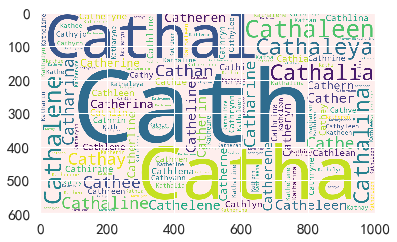

In [149]:
name = list(Catherine_data.index)
value = list(Catherine_data.values)
wordcloud = WordCloud(width=1000, height=600,background_color='#feeeed')  # feeeed #设置图片格式
#wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
frequency={key:val for key in name for val in value}#转成dict
wordcloud.generate_from_frequencies(frequency)#画词云图
plt.imshow(wordcloud)#画出图片

In [150]:
Emily = data['Name'][data['Name'].str.contains('Emil(.*)')].unique()#Emil*

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [151]:
Emily_data = data[data['Name'].isin(Emily)].groupby('Name').Count.sum()

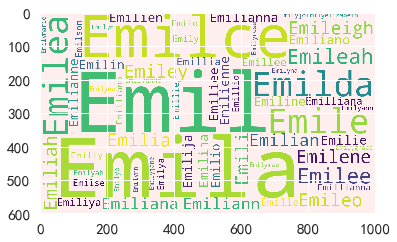

In [152]:
name = list(Emily_data.index)
value = list(Emily_data.values)
wordcloud = WordCloud(width=1000, height=600,background_color='#feeeed')  # feeeed
# wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
frequency={key:val for key in name for val in value}#转成dict
wordcloud.generate_from_frequencies(frequency)
plt.imshow(wordcloud)#画出图片

## 7. 一些具有特殊含义的名字，有多少人取？

In [153]:
# def name_trend2(name, data, gender, dodge=100):
#     name_data = data[(data['Name']==name)&(data['Gender']==gender)]
#     attr = list(name_data['Year'].values)
#     v1 = name_data['Count'].values

#     bar = Bar(name)
#     bar.add("", attr, list(v1), legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
    
#     line = Line()
#     line.add("", attr, list(v1 + dodge))
    
#     overlap = Overlap()
#     overlap.add(bar)
#     overlap.add(line)
#     return overlap

def name_trend2(name, data, gender, dodge=100):
    name_data = data[(data['Name']==name)&(data['Gender']==gender)]#取出特定名字和性别的数据
    attr = list(name_data['Year'].values)#取出数据里的年份
    attr=[str(i) for i in attr]#转字符串
    v1 = name_data['Count'].values#取出count值
    v1= [int(i) for i in v1]#转int
    v1d= [int(i)+dodge for i in v1]#转int
    bar = Bar()#画bar图
    bar.add_xaxis(attr)#bar的横坐标
    bar.add_yaxis(name, list(v1))#第一组数据
    bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))#不展示点标签
    
    line = Line()
    line.add_xaxis(attr)#line的横坐标
    line.add_yaxis(name, v1d,label_opts=opts.LabelOpts(is_show=False))#不加标签)
        
    bar.overlap(line)
    return bar.render_notebook()#画图

In [154]:
name_trend2('Dick',data,gender='M', dodge=50)

In [155]:
name_trend2('Dong', data, gender='M', dodge=1)

In [156]:
name_trend2('Cherry',data,gender='F', dodge=10)

## 8. 一些特殊的名字

In [157]:
class Solution:
    # @return a string
    def getlongestpalindrome(self, s, l, r):
        while l >= 0 and r < len(s) and s[l] == s[r]:
            l -= 1; r += 1
        return s[l+1 : r]
    def longestPalindrome(self, s):
        palindrome = ''
        for i in range(len(s)):
            len1 = len(self.getlongestpalindrome(s, i, i))
            if len1 > len(palindrome): palindrome = self.getlongestpalindrome(s, i, i)
            len2 = len(self.getlongestpalindrome(s, i, i + 1))
            if len2 > len(palindrome): palindrome = self.getlongestpalindrome(s, i, i + 1)
        return True if len(palindrome) > 5 else False

In [158]:
a = Solution()

In [159]:
a.longestPalindrome('alfrederfl')

True

In [160]:
all_name = data['Name'].unique()

In [161]:
palindrome_name = []
for name in all_name:
    if a.longestPalindrome(name):
        palindrome_name.append(name)

In [162]:
palindrome_data = data[data['Name'].isin(palindrome_name)].groupby('Name').Count.sum()

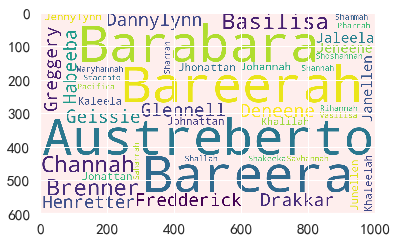

In [163]:
name = list(palindrome_data.index)
value = list(palindrome_data.values)
wordcloud = WordCloud(width=1000, height=600,background_color='#feeeed')  # feeeed
#wordcloud.add("", name, value, word_size_range=[20, 100],shape='diamond')
frequency={key:val for key in name for val in value}#转成dict
wordcloud.generate_from_frequencies(frequency)
plt.imshow(wordcloud)#画出图片